# 1.
Предупреждаем, сейчас будет запутанно. В предыдущих уроках вы рассчитывали медианы по АЗС. Теперь нужно рассчитать медиану этих медиан по каждой сети. Это даст ещё один показатель «типичной» медианной длительности заездов в каждой сети: медиану распределения медианной длительности заездов на АЗС.
Из этого распределения медиан нужно будет исключить медианные значения, рассчитанные для АЗС с совсем небольшим числом заездов. Создайте таблицу со статистикой по АЗС, с помощью которой выявите и отфильтруйте эти лишние станции.
Выполните следующие шаги:
Создайте переменную station_stat_full, которая для каждой АЗС хранит название сети, число заездов и лучший показатель медианной длительности заправки. Подсказка: название сети и число заездов есть в id_name, а лучший показатель медианной длительности заправки — в good_stations_stat. Объедините эти две таблицы.
Выведите на экран первые 5 строк, чтобы посмотреть новую таблицу.

Подсказка
Так как у таблиц id_name и good_stations_stat одинаковые индексы id , метод join() подойдёт идеально. Примените join() к таблице id_name, передав ей good_stations_stat.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('../datasets/visits.csv', sep='\t')

# фильтруем слишком быстрые и медленные заезды и АЗС
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000
too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')

# считаем данные по отдельным АЗС и по сетям
station_stat = data.pivot_table(index='id', values='time_spent', aggfunc='median')
good_stations_stat = good_data.pivot_table(index='id', values='time_spent', aggfunc='median')

stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
stat['good_time_spent'] = good_stat['time_spent']

id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
id_name.columns = ['name', 'count']

station_stat_full = id_name.join(good_stations_stat)
print(station_stat_full.head())

                 name  count  time_spent
id                                      
00ca1b70     Вероника    131       166.0
0178ce70      Василёк    164       234.5
01abf4e9      Гацания     30       181.5
030a9067  Колокольчик    228       135.5
03740f2d      Василёк    157       289.0


# 2.
В статистике такое часто бывает: суммарные значения, полученные из малого количества данных, оказываются ненадёжными. Представьте, что вы вернулись к сырым данным и рассчитали медианное значение длительности для десяти случайно выбранных заездов. А потом повторили эту процедуру двадцать раз. Разброс этих двадцати медианных значений практически гарантированно будет гораздо больше, чем в том случае, если бы вы каждый раз случайным образом выбирали по сто заездов.
Медианные значения, относящиеся к небольшому числу заездов, тоже могут быть ненадёжными — их лучше удалить. Но для начала посмотрите, как число заездов распределяется по АЗС.
Выполните следующие шаги:
Используя данные из station_stat_full, постройте гистограмму числа заездов на 30 корзин.
Постройте вторую гистограмму по тем же данным, но теперь задайте диапазон от 0 до 300 заездов.
Сравните полученные гистограммы.
Подсказка:
Примените метод hist() к таблице station_stat_full. Первым аргументом передайте правильное название столбца. Первый вызов hist() должен содержать параметр bins=. Второй вызов hist() должен содержать параметры bins= и range=.

In [4]:
station_stat_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386 entries, 00ca1b70 to ff0f01d2
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        386 non-null    object 
 1   count       386 non-null    int64  
 2   time_spent  386 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.2+ KB


<AxesSubplot:ylabel='Frequency'>

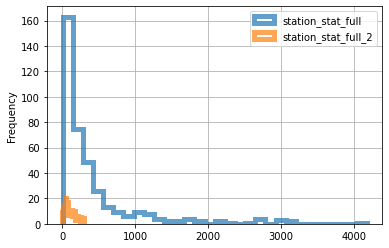

In [5]:
ax = station_stat_full.plot(kind='hist',
                            y='count',
                            histtype='step',
                            bins=30,
                            linewidth=5,
                            alpha=0.7,
                            label='station_stat_full')
station_stat_full.plot(kind='hist',
                       y='count',
                       histtype='step',
                       range=(0,300),
                       bins=30,
                       linewidth=5,
                       alpha=0.7,
                       label='station_stat_full_2',
                       ax=ax,
                       grid=True,
                       legend=True)

<AxesSubplot:>

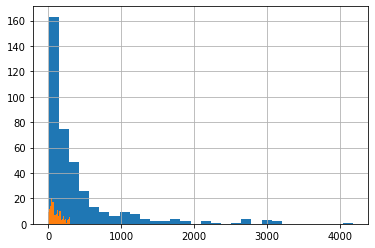

In [9]:
station_stat_full['count'].hist(bins=30)
station_stat_full['count'].hist(bins=30, range=(0,300))

# 3.
Изучив построенные гистограммы, вы решили исключить те АЗС, на которые в течение семи дней заезжали 30 или менее раз. Для этого нужно найти в таблице station_stat_full АЗС с числом заездов больше 30, сгруппировать их по названию сети и рассчитать медиану медианных значений. Как вы помните, медианные значения в таблице station_stat_full — это медианная длительность заправок по АЗС. Чтобы получить значение по каждой сети, возьмите медиану этих медиан.
Выполните следующие шаги:
Не прибегая к вспомогательной переменной, сделайте срез данных из таблицы station_stat_full — так вы найдёте все строки, где число заездов больше 30. Для каждой сети рассчитайте медиану медианного времени заезда на АЗС, а также число АЗС, из которых складывается эта новая медиана. Сохраните результат в переменной good_stat2.
Измените названия столбцов в таблице good_stat2 на median_time и stations.
Выведите на экран первые пять строк good_stat2.

Подсказка
Методом station_stat_full.query().pivot_table() сделайте срез данных и рассчитайте статистику. Укажите count > 30. Передайте параметру aggfunc= в методе pivot_table() список ['median', 'count']. Сохраните результат в переменной good_stat2.
Примените атрибут columns к good_stat2, чтобы переименовать столбцы в median_time и stations.

In [11]:
good_stat2 = station_stat_full.query('count > 30').pivot_table(index='name', values='time_spent', aggfunc=['median', 'count'])
good_stat2.columns = ['median_time', 'stations']
print(good_stat2.head())

          median_time  stations
name                           
Агератум       308.50         3
Амарант        169.00         5
Аммобиум       178.75         4
Арктотис       190.50         3
Астильба       435.50         4


# 4.
Снова вызовите таблицу stat, которую вы создали несколько уроков назад. Вы использовали её, чтобы посмотреть, насколько различаются два показателя «типичной» длительности заправки: среднее время заправки, полученное из сырых данных, и медианное время заправки, полученное из отфильтрованных данных. Теперь у вас есть третий показатель. Внесите его в эту таблицу и посмотрите на результаты.
Выполните следующие шаги:
Добавьте good_stat2 в stat и сохраните получившуюся таблицу под именем final_stat.
Выведите на экран final_stat полностью и сравните показатели.

Подсказка
Соедините две таблицы методом join(). Без каких-либо дополнительных параметров.

In [12]:
final_stat = stat.join(good_stat2)
print(final_stat.head())

          time_spent  good_time_spent  median_time  stations
name                                                        
Агератум  337.802721            309.0       308.50       3.0
Амарант   132.760012            187.5       169.00       5.0
Аммобиум  256.708042            180.5       178.75       4.0
Арктотис   73.879984            185.0       190.50       3.0
Астильба  376.143149            423.0       435.50       4.0
